## Midterm Project


You will demonstrate your ability to solve a classification task.

The notebook that you submit *should follow the Recipe for Machine Learning* in addition to answering the questions.

# Objectives

For the student to demonstrate mastery on solving a classification problem and presenting
the entire Recipe for Machine Learning process in a notebook.

There will be little explicit direction for this task.

It is meant to be analagous to a pre-interview task that a potential employer might assign
to verify your skill

# The problem

You are to predict whether a company will go bankrupt in the following year, based on financial attributes of the company.
- Each row of data corresponds to a single company
- There are 64 attributes, described in the section below
- The last column (`Bankrupt`) is 1 if the company subsequently went bankrupt; 0 if it did not go bankrupt
- The first column is a Company Identifier

# The Data

Here's the code to get the data.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from scipy.io import arff
from sklearn.preprocessing import Imputer
#import fancyimpute
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve

In [2]:
import os

# Note the use of *relative path*; your assignments should all use relative rather than absolute paths
DATA_PATH = "./data"

data = pd.read_csv( os.path.join(DATA_PATH, "bankruptcy_data.csv") )

In [3]:
data.head()

,Id,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X56,X57,X58,X59,X60,X61,X62,X63,X64,Bankrupt
0,311,0.24181,0.22257,0.69576,4.1391,291.09,0,0.30179,3.493,1.0903,...,0.303190,0.31103,0.72340,0,11.346,1.4722,74.199,4.9192,13.199,0
1,592,0.22238,0.49951,0.18799,2.0738,34.422,0.67774,0.27241,0.95653,1.3843,...,0.277610,0.46544,0.72239,0.67903,11.762,6.6669,58.208,6.2706,1.7235,0
2,2051,0.18159,0,1,?,41.034,-0.50524,0.18159,?,5.2157,...,0.020505,0.18159,0.96588,0,12.467,9.2532,0.000,?,?,0
3,3230,0.030523,0.25841,0.053955,1.3421,2.9713,0.085922,0.045425,2.3036,1.0247,...,0.024082,0.051274,0.97592,0.16918,22.864,9.3064,54.945,6.643,1.3289,0
4,3377,0.005688,0.48642,-0.11828,0.75677,-53.123,-0.13066,0.005688,1.0558,2.2043,...,0.135840,0.011075,0.88498,0,14.034,10.87,80.521,4.533,3.4878,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4076 entries, 0 to 4075
Data columns (total 66 columns):
Id          4076 non-null int64
X1          4076 non-null object
X2          4076 non-null object
X3          4076 non-null object
X4          4076 non-null object
X5          4076 non-null object
X6          4076 non-null object
X7          4076 non-null object
X8          4076 non-null object
X9          4076 non-null object
X10         4076 non-null object
X11         4076 non-null object
X12         4076 non-null object
X13         4076 non-null float64
X14         4076 non-null object
X15         4076 non-null object
X16         4076 non-null object
X17         4076 non-null object
X18         4076 non-null object
X19         4076 non-null float64
X20         4076 non-null float64
X21         4076 non-null object
X22         4076 non-null object
X23         4076 non-null float64
X24         4076 non-null object
X25         4076 non-null object
X26         4076 non-null object

In [5]:
#Remove duplicates
data.drop_duplicates(inplace = True) 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3107 entries, 0 to 4075
Data columns (total 66 columns):
Id          3107 non-null int64
X1          3107 non-null object
X2          3107 non-null object
X3          3107 non-null object
X4          3107 non-null object
X5          3107 non-null object
X6          3107 non-null object
X7          3107 non-null object
X8          3107 non-null object
X9          3107 non-null object
X10         3107 non-null object
X11         3107 non-null object
X12         3107 non-null object
X13         3107 non-null float64
X14         3107 non-null object
X15         3107 non-null object
X16         3107 non-null object
X17         3107 non-null object
X18         3107 non-null object
X19         3107 non-null float64
X20         3107 non-null float64
X21         3107 non-null object
X22         3107 non-null object
X23         3107 non-null float64
X24         3107 non-null object
X25         3107 non-null object
X26         3107 non-null object

In [6]:
data.describe()

,Id,X13,X19,X20,X23,X30,X31,X39,X42,X43,X44,X49,X55,X56,X58,X62,Bankrupt
count,3107.000000,3107.000000,3107.000000,3107.000000,3107.000000,3107.000000,3107.000000,3107.000000,3107.000000,3107.000000,3107.000000,3107.000000,3.107000e+03,3107.000000,3107.000000,3107.000000,3107.000000
mean,3116.645961,-0.135274,-0.186074,57.277489,-0.192498,1.224169,-0.147815,-0.007868,-0.061251,173.679019,116.401467,-0.112167,1.078597e+04,0.035035,0.978707,361.366703,0.131960
std,1780.610118,7.327641,7.350188,192.982914,7.314915,25.851850,7.089086,0.962377,2.912918,1038.386060,962.816250,2.963503,6.348214e+04,0.936503,1.080713,8571.476168,0.338502
min,0.000000,-310.340000,-310.800000,-29.340000,-310.890000,-16.110000,-310.800000,-47.047000,-143.520000,-3975.600000,-3946.200000,-144.800000,-2.955400e+05,-46.788000,-0.164390,-236.530000,0.000000
25%,1552.500000,0.019621,0.001816,18.246500,0.000663,0.091894,0.003906,0.002744,0.000000,76.301000,38.250500,-0.029594,2.954450e+01,0.007456,0.878775,46.156500,0.000000
50%,3111.000000,0.064121,0.032497,38.708000,0.027851,0.236380,0.039642,0.036684,0.036732,108.080000,59.014000,0.009318,1.660900e+03,0.049833,0.952840,76.244000,0.000000
75%,4718.500000,0.130220,0.085522,67.891000,0.072658,0.420080,0.094919,0.086618,0.086099,150.060000,85.296500,0.057076,7.457600e+03,0.121855,0.992760,122.640000,0.000000
max,5909.000000,78.190000,77.244000,9928.500000,77.244000,1236.700000,77.244000,2.901100,18.088000,40515.000000,40515.000000,16.866000,1.634200e+06,1.651000,47.788000,451380.000000,1.000000


# Description of attributes

In [7]:
data=data.replace('?',np.nan)
for i in range(1,65):
     data[data.columns[i]]=data[data.columns[i]].astype('float64')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3107 entries, 0 to 4075
Data columns (total 66 columns):
Id          3107 non-null int64
X1          3104 non-null float64
X2          3104 non-null float64
X3          3104 non-null float64
X4          3093 non-null float64
X5          3102 non-null float64
X6          3104 non-null float64
X7          3104 non-null float64
X8          3094 non-null float64
X9          3106 non-null float64
X10         3104 non-null float64
X11         3104 non-null float64
X12         3093 non-null float64
X13         3107 non-null float64
X14         3104 non-null float64
X15         3102 non-null float64
X16         3094 non-null float64
X17         3094 non-null float64
X18         3104 non-null float64
X19         3107 non-null float64
X20         3107 non-null float64
X21         3006 non-null float64
X22         3104 non-null float64
X23         3107 non-null float64
X24         3046 non-null float64
X25         3104 non-null float64
X26        

In [8]:
x=data.drop(['Id','Bankrupt'],axis=1)
y=data.Bankrupt

# Feature Selection

## 1.Missing Values
- Fill missing value with median.

In [9]:
#Check columns has missing value
list_has_NAN=x.columns[x.isnull().any()].tolist()
x.columns[x.isnull().any()]

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X14', 'X15', 'X16', 'X17', 'X18', 'X21', 'X22', 'X24', 'X25',
       'X26', 'X27', 'X28', 'X29', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37',
       'X38', 'X40', 'X41', 'X45', 'X46', 'X47', 'X48', 'X50', 'X51', 'X52',
       'X53', 'X54', 'X57', 'X59', 'X60', 'X61', 'X63', 'X64'],
      dtype='object')

In [10]:
from sklearn.base import BaseEstimator, TransformerMixin

# A class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]

from sklearn.pipeline import Pipeline
try:
    from sklearn.impute import SimpleImputer # Scikit-Learn 0.20+
except ImportError:
    from sklearn.preprocessing import Imputer as SimpleImputer


num_pipeline = Pipeline([
        ("select_numeric", DataFrameSelector( x.columns )),
        ("imputer", SimpleImputer(strategy="median")),
    ])

x_new = num_pipeline.fit_transform(x)
print(x_new.shape)

x=pd.DataFrame(data=x_new,columns=x.columns)  
print(x.info())

(3107, 64)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3107 entries, 0 to 3106
Data columns (total 64 columns):
X1     3107 non-null float64
X2     3107 non-null float64
X3     3107 non-null float64
X4     3107 non-null float64
X5     3107 non-null float64
X6     3107 non-null float64
X7     3107 non-null float64
X8     3107 non-null float64
X9     3107 non-null float64
X10    3107 non-null float64
X11    3107 non-null float64
X12    3107 non-null float64
X13    3107 non-null float64
X14    3107 non-null float64
X15    3107 non-null float64
X16    3107 non-null float64
X17    3107 non-null float64
X18    3107 non-null float64
X19    3107 non-null float64
X20    3107 non-null float64
X21    3107 non-null float64
X22    3107 non-null float64
X23    3107 non-null float64
X24    3107 non-null float64
X25    3107 non-null float64
X26    3107 non-null float64
X27    3107 non-null float64
X28    3107 non-null float64
X29    3107 non-null float64
X30    3107 non-null float64
X31    3107 

## 2. Remove  features with low variance
- By default it removes features with zero variance or features that have the same value for all samples.

In [11]:
from sklearn import feature_selection

def Remove_low_variance(df):
    #remove the features that have the same value in all samples.
    selection = feature_selection.VarianceThreshold()
    apply_filter = selection.fit_transform(df)
    print(apply_filter.shape)
    print(x.columns[selection.get_support()])
    return x.columns[selection.get_support()].tolist()

selected_features=Remove_low_variance(x) 

(3107, 64)
Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31',
       'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41',
       'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51',
       'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61',
       'X62', 'X63', 'X64'],
      dtype='object')


- None of features has same value

## 3. Remove highly correlated features
- Features that are highly correlated or colinear can cause overfitting.

In [12]:
# find correlations to target
corr_matrix = data.corr().abs()
print(corr_matrix['Bankrupt'].sort_values(ascending=False).head(20))

Bankrupt    1.000000
Id          0.566751
X29         0.211505
X2          0.145366
X51         0.135866
X3          0.132253
X39         0.095564
X56         0.083464
X32         0.078735
X55         0.073845
X45         0.073682
X20         0.071124
X58         0.067541
X57         0.067159
X43         0.064152
X6          0.062184
X33         0.060026
X16         0.059250
X26         0.058725
X18         0.057448
Name: Bankrupt, dtype: float64


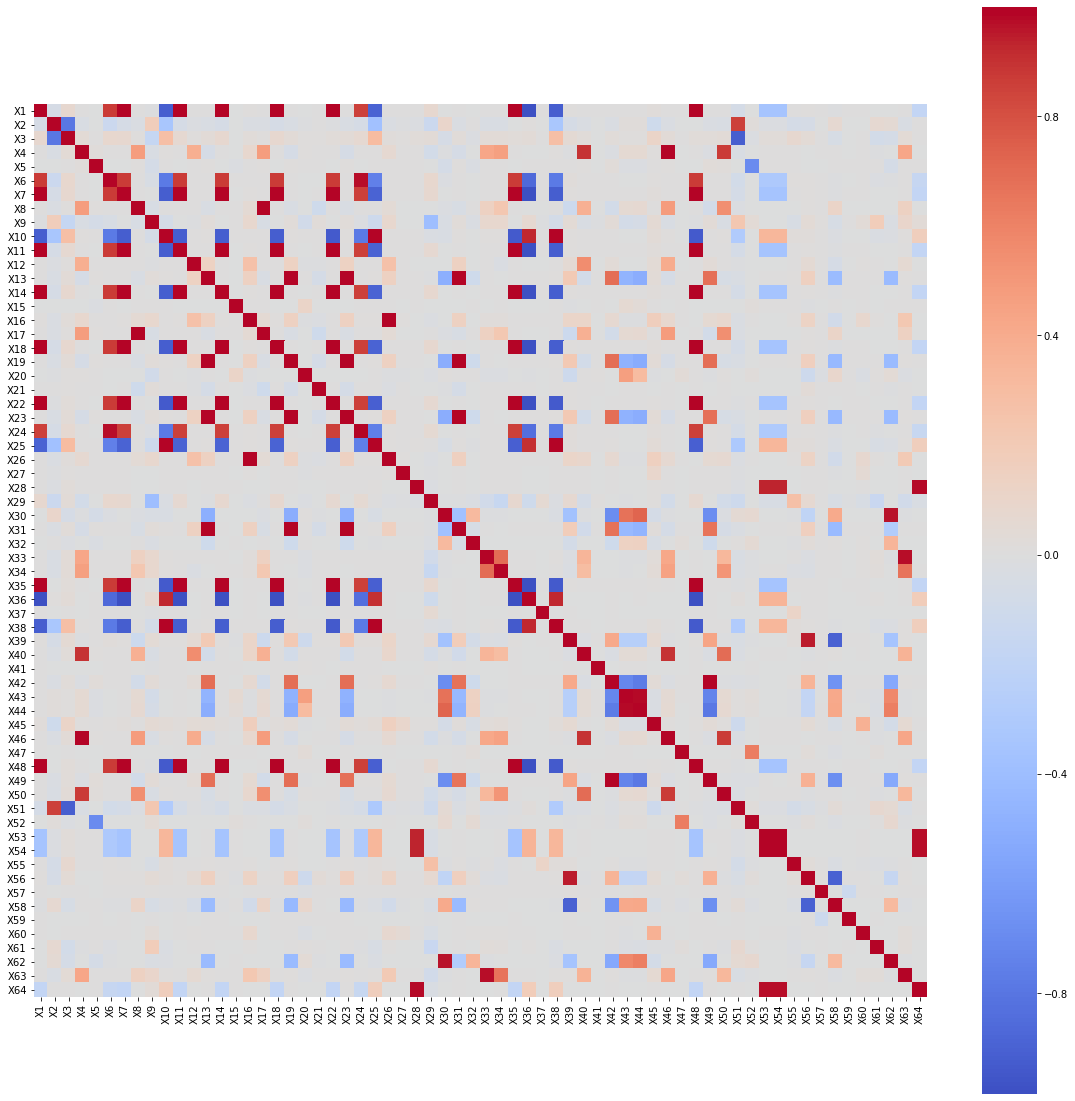

In [13]:
matrix = x.corr()
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(matrix, vmax=1.0, center=0,
                square=True,cmap='coolwarm')

In [14]:
threshold=0.5
def remove_high_correlated_feature(df):
        data_feature=df
        matrix = data_feature.corr().abs()
        col_corr = set() # Set of all the names of deleted columns
        for i in range(len(matrix.columns)):
            for j in range(i):
                if (matrix.iloc[i, j] >= threshold) and (matrix.columns[j] not in col_corr):
                    colname = matrix.columns[i] # getting the name of column
                    col_corr.add(colname)
                    if colname in data_feature.columns:
                        del data_feature[colname] # deleting the column from the dataset
        
        print('deleted column:',col_corr)
        return data_feature
      
x=remove_high_correlated_feature(x)
print(x.info()) # Print left columns after remove high correlated features

deleted column: {'X54', 'X35', 'X22', 'X19', 'X36', 'X10', 'X30', 'X24', 'X17', 'X49', 'X34', 'X7', 'X31', 'X42', 'X46', 'X64', 'X44', 'X50', 'X23', 'X26', 'X3', 'X63', 'X14', 'X48', 'X52', 'X53', 'X6', 'X58', 'X25', 'X18', 'X51', 'X38', 'X40', 'X56', 'X11', 'X62'}
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3107 entries, 0 to 3106
Data columns (total 28 columns):
X1     3107 non-null float64
X2     3107 non-null float64
X4     3107 non-null float64
X5     3107 non-null float64
X8     3107 non-null float64
X9     3107 non-null float64
X12    3107 non-null float64
X13    3107 non-null float64
X15    3107 non-null float64
X16    3107 non-null float64
X20    3107 non-null float64
X21    3107 non-null float64
X27    3107 non-null float64
X28    3107 non-null float64
X29    3107 non-null float64
X32    3107 non-null float64
X33    3107 non-null float64
X37    3107 non-null float64
X39    3107 non-null float64
X41    3107 non-null float64
X43    3107 non-null float64
X45    3107 non-nu

## 4.Feature Importance
- Use two models to select important features

Feature Importance ranking:
('X1', 0.07042527802675164)
('X2', 0.058681733696388044)
('X4', 0.031000917122963836)
('X5', 0.026635757437218535)
('X8', 0.02849651159297877)
('X9', 0.03371887694254459)
('X12', 0.03047572399489555)
('X13', 0.03711268953028534)
('X15', 0.031049286047247212)
('X16', 0.03458478376054046)
('X20', 0.02999547191717638)
('X21', 0.03947194667635481)
('X27', 0.03564747176040093)
('X28', 0.02836259420873602)
('X29', 0.054791653145216036)
('X32', 0.03537431720685703)
('X33', 0.032909225171610955)
('X37', 0.023851961058612932)
('X39', 0.06285995418680349)
('X41', 0.027232941460239045)
('X43', 0.030800683480008334)
('X45', 0.03237019537534483)
('X47', 0.023320117540474198)
('X55', 0.037627562953581425)
('X57', 0.04620430944614228)
('X59', 0.02301017344954688)
('X60', 0.024213088379574695)
('X61', 0.029774774431505748)


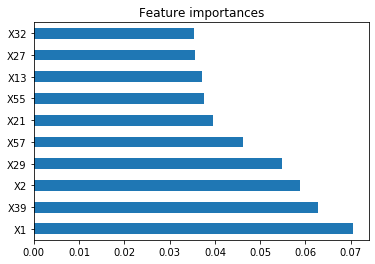

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3107 entries, 0 to 3106
Data columns (total 10 columns):
X1     3107 non-null float64
X39    3107 non-null float64
X2     3107 non-null float64
X29    3107 non-null float64
X57    3107 non-null float64
X21    3107 non-null float64
X55    3107 non-null float64
X13    3107 non-null float64
X27    3107 non-null float64
X32    3107 non-null float64
dtypes: float64(10)
memory usage: 242.8 KB


In [15]:
from sklearn.ensemble import ExtraTreesClassifier
# feature extraction using top 10 importance

model_1= ExtraTreesClassifier(n_estimators=200,random_state=0)

def feature_selection(x_df, y_df, model):
        model.fit(x_df, y_df)
        importances = model.feature_importances_
        
        feat_importances = pd.Series(importances,index=x_df.columns)
        selected_feature=feat_importances.nlargest(10).index.tolist()
        
        x_df_new=x_df[selected_feature]

        print("Feature Importance ranking:")

        for feature in zip(x.columns, model.feature_importances_):
            print(feature)
        
        plt.figure()
        plt.title("Feature importances")
        feat_importances.nlargest(10).plot(kind='barh')
        plt.show()
        
        
        return x_df_new

x_1=feature_selection(x,y,model_1)
x_1.info()

Feature Importance ranking:
('X1', 0.04548358612700591)
('X2', 0.023453741164838858)
('X4', 0.032516560504828776)
('X5', 0.025724161575589023)
('X8', 0.028626208554792403)
('X9', 0.030815209947007084)
('X12', 0.033584486972191026)
('X13', 0.05038932485793891)
('X15', 0.04389607931952446)
('X16', 0.04305245139923575)
('X20', 0.01991563465190338)
('X21', 0.055182279803890955)
('X27', 0.06186965914247862)
('X28', 0.03951539452468673)
('X29', 0.036331027030744076)
('X32', 0.024787306006167194)
('X33', 0.02447858679562356)
('X37', 0.0164387079362834)
('X39', 0.07861567732864005)
('X41', 0.078001184545001)
('X43', 0.028210513096114314)
('X45', 0.03139972528643396)
('X47', 0.01877626940103194)
('X55', 0.038067734623178535)
('X57', 0.028610663584967406)
('X59', 0.01448493047418253)
('X60', 0.021688156245696057)
('X61', 0.026084739100023964)


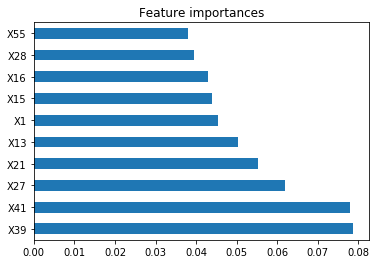

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3107 entries, 0 to 3106
Data columns (total 10 columns):
X39    3107 non-null float64
X41    3107 non-null float64
X27    3107 non-null float64
X21    3107 non-null float64
X13    3107 non-null float64
X1     3107 non-null float64
X15    3107 non-null float64
X16    3107 non-null float64
X28    3107 non-null float64
X55    3107 non-null float64
dtypes: float64(10)
memory usage: 242.8 KB


In [16]:
model_2=RandomForestClassifier(n_estimators=400, random_state=0, n_jobs=-1)
x_2=feature_selection(x,y,model_2)
x_2.info()

# Fitting Models
### 1. Calculate Cross Validation Score and Accuracy Score

In [17]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=400, random_state=42, class_weight="balanced")

from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(n_estimators=400, random_state=42)

from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state=42)


#Data Split into train and test
x_train_v1, x_test_v1, y_train_v1, y_test_v1 = train_test_split(
    x_2, y, test_size=0.2, random_state=1)


for name, clf in { "Random Forest": forest_clf,
                   "GradientBoosting":gb_clf,
                   "DecisionTree":dt_clf
                 }.items():
    
    _= clf.fit(x_train_v1, y_train_v1)
    
    #X_test = preprocess_pipeline.transform(test_data)
    y_pred = clf.predict(x_test_v1)

    scores = cross_val_score(clf, x_train_v1, y_train_v1, cv=10)
    accuracy=accuracy_score(y_test_v1,y_pred,normalize=True)
    
    print("Model: {m:s} avg cross val score={s:3.2f} accuracy={a:3.2f}\n".format(m=name, s=scores.mean(), a=accuracy))

Model: Random Forest avg cross val score=0.91 accuracy=0.89

Model: GradientBoosting avg cross val score=0.91 accuracy=0.92

Model: DecisionTree avg cross val score=0.87 accuracy=0.90



### 2. Confusion Matrix

In [18]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        # Normalize by row sums
        cm_pct = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(100 * cm_pct, decimals=0).astype(int)

        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        # Plot coordinate system has origin in upper left corner
        # -  coordinates are (horizontal offset, vertical offset)
        # -  so cm[i,j] should appear in plot coordinate (j,i)
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

### 2.1 Confusion Matrix - Random Forest

Normalized confusion matrix
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       544
           1       0.65      0.33      0.44        78

    accuracy                           0.89       622
   macro avg       0.78      0.65      0.69       622
weighted avg       0.88      0.89      0.88       622



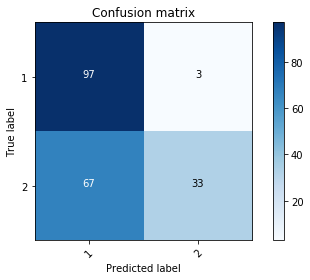

In [19]:
forest_clf1 = RandomForestClassifier(n_estimators=400, random_state=42, class_weight="balanced")

_= forest_clf1.fit(x_train_v1, y_train_v1)
    
#X_test = preprocess_pipeline.transform(test_data)
y_pred1 = forest_clf1.predict(x_test_v1)
results1 = confusion_matrix(y_test_v1, y_pred1)
plot_confusion_matrix(results1, range(1, 3), normalize=True)
print(classification_report(y_test_v1, y_pred1))

### 2.2 Confusion Matrix - GradientBoosting

Normalized confusion matrix
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       544
           1       0.76      0.50      0.60        78

    accuracy                           0.92       622
   macro avg       0.85      0.74      0.78       622
weighted avg       0.91      0.92      0.91       622



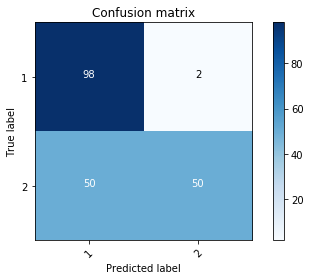

In [20]:
gb_clf1 = GradientBoostingClassifier(n_estimators=400, random_state=42)

_= gb_clf1.fit(x_train_v1, y_train_v1)
y_pred2 = gb_clf1.predict(x_test_v1)
results2 = confusion_matrix(y_test_v1, y_pred2)
plot_confusion_matrix(results2, range(1, 3), normalize=True)
print(classification_report(y_test_v1, y_pred2))

### 2.3 Confusion Matrix - Decision Tree

Normalized confusion matrix
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       544
           1       0.58      0.59      0.59        78

    accuracy                           0.90       622
   macro avg       0.76      0.76      0.76       622
weighted avg       0.90      0.90      0.90       622



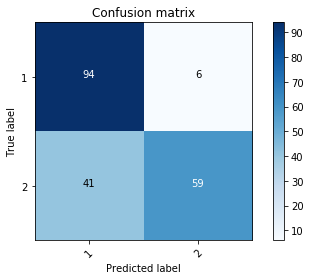

In [21]:
dt_clf1 = DecisionTreeClassifier(random_state=42)

_= dt_clf1.fit(x_train_v1, y_train_v1)
    
y_pred3 = dt_clf1.predict(x_test_v1)
results3 = confusion_matrix(y_test_v1, y_pred3)
plot_confusion_matrix(results3, range(1, 3), normalize=True)
print(classification_report(y_test_v1, y_pred3))

#### Results Summary
- Compared to above three models, we find out although accuracy is high, precision and recall for minority class (Bankruptcy) is low. 
- Gradient Boosting Model is the best choice so far !!!

# Extra credit opportunities
- Address the issue of: classes being imbalanced
- Address the issue of: Different importance of each type of misclassification
    - It is 5 times worse to misclassify a company that *does go bankrupt* than to misclassify a company that does not go bankrupt
        - Suppose we invest in a company for which we predict it will not go bankrupt
            - We incur substantial losses for a bad investment
        - The loss from not investing in a company that we incorrectly classify as going bankrupt is small (opportunity cost)

In [22]:
#Look at the entired imbalanced data

In [23]:
print(data['Bankrupt'].value_counts())

0    2697
1     410
Name: Bankrupt, dtype: int64


# Oversampling Imbalanced Data

In [24]:
from imblearn.over_sampling import (RandomOverSampler, 
                                    SMOTE, 
                                    ADASYN)

# SMOTE
sampler = SMOTE(ratio=1,random_state=0)
X_rs, y_rs = sampler.fit_sample(x_train_v1, y_train_v1)

# Fitting Models
### 1. Calculate Cross Validation Score and Accuracy Score

In [25]:
forest_clf2 = RandomForestClassifier(n_estimators=400, random_state=42, class_weight="balanced")

gb_clf2= GradientBoostingClassifier(n_estimators=400, random_state=42)

dt_clf2 = DecisionTreeClassifier(random_state=42)

for name, clf2 in { "Random Forest": forest_clf2,
                   "GradientBoosting":gb_clf2,
                   "DecisionTree":dt_clf2
                 }.items():
    

    _= clf2.fit(X_rs, y_rs)
    y_pred = clf2.predict(x_test_v1)

    scores = cross_val_score(clf2, X_rs, y_rs, cv=10)
    accuracy=accuracy_score(y_test_v1,y_pred,normalize=True)
    
    print("Model: {m:s} avg cross val score={s:3.2f} accuracy={a:3.2f}\n".format(m=name, s=scores.mean(), a=accuracy))


Model: Random Forest avg cross val score=0.93 accuracy=0.86

Model: GradientBoosting avg cross val score=0.89 accuracy=0.85

Model: DecisionTree avg cross val score=0.87 accuracy=0.82



## 2. Confusion Matrix

### 2.1 Confusion Matrix - Random Forest

Normalized confusion matrix
              precision    recall  f1-score   support

           0       0.94      0.91      0.92       544
           1       0.47      0.58      0.52        78

    accuracy                           0.86       622
   macro avg       0.70      0.74      0.72       622
weighted avg       0.88      0.86      0.87       622



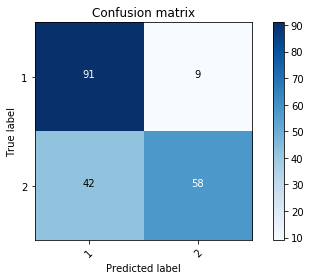

In [26]:
forest_clf3 = RandomForestClassifier(n_estimators=400, random_state=42, class_weight="balanced")

_= forest_clf3.fit(X_rs, y_rs)
    
y_pred4 = forest_clf3.predict(x_test_v1)
results4 = confusion_matrix(y_test_v1, y_pred4)
plot_confusion_matrix(results4, range(1, 3), normalize=True)
print(classification_report(y_test_v1, y_pred4))

### 2.2 Confusion Matrix - Gradient Boosting

Normalized confusion matrix
              precision    recall  f1-score   support

           0       0.95      0.87      0.91       544
           1       0.43      0.69      0.53        78

    accuracy                           0.85       622
   macro avg       0.69      0.78      0.72       622
weighted avg       0.89      0.85      0.86       622



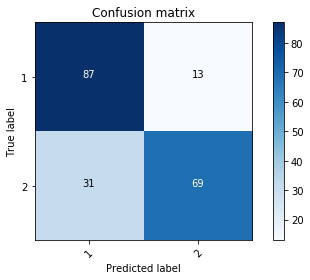

In [27]:
gb_clf3 = GradientBoostingClassifier(n_estimators=400, random_state=42)

_= gb_clf3.fit(X_rs, y_rs)
y_pred5 = gb_clf3.predict(x_test_v1)
results5 = confusion_matrix(y_test_v1, y_pred5)
plot_confusion_matrix(results5, range(1, 3), normalize=True)
print(classification_report(y_test_v1, y_pred5))

### 2.3 Confusion Matrix - Decision Tree

Normalized confusion matrix
              precision    recall  f1-score   support

           0       0.93      0.86      0.89       544
           1       0.36      0.55      0.43        78

    accuracy                           0.82       622
   macro avg       0.64      0.70      0.66       622
weighted avg       0.86      0.82      0.83       622



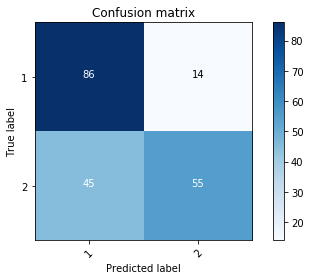

In [28]:
dt_clf3 = DecisionTreeClassifier(random_state=42)

_= dt_clf3.fit(X_rs, y_rs)
    
y_pred6 = dt_clf3.predict(x_test_v1)
results6 = confusion_matrix(y_test_v1, y_pred6)
plot_confusion_matrix(results6, range(1, 3), normalize=True)
print(classification_report(y_test_v1, y_pred6))

#### Summary
- After doing oversampling for the original data, we could find out precision and recall in Bankruptcy predicion increase in above models, but accuracy decreases at the same time.
- Precision and recall are important metrics for minority class.
- It's trade off results when we look at the confusion matrix. 
- Gradient Boosting Model is the best after we look at all the results.

# Prediction-My Model

In [29]:
TEST_PATH = "./data"

import pandas as pd
import os

testFileName = os.path.join(TEST_PATH, "test.csv")

def MyModel(fileName=None):
    print("Test file: ", fileName)
    
    # It should create an array of predictions; we initialize it to the empty array for convenience
    predictions = []
    
    # YOUR CODE GOES HERE
    test = pd.read_csv(fileName)
    test = test.replace('?',np.nan)
    
    
    num_pipeline_test = Pipeline([
        ("select_numeric", DataFrameSelector(test.columns)),
        ("imputer", SimpleImputer(strategy="median")),
    ])
    
    x_test_new = num_pipeline_test.fit_transform(test)
    x_test = pd.DataFrame(data=x_test_new,columns=test.columns)  
    

    columns_name=x_2.columns
    x_test=x_test[columns_name]
    
    print(x_test.info())

    gb_clf_final = GradientBoostingClassifier(n_estimators=400, random_state=42)

    _= gb_clf_final.fit(x_train_v1, y_train_v1)
    predictions = gb_clf_final.predict(x_test)
    
    print(predictions)
    return predictions

predicts = MyModel(fileName=testFileName)

Test file:  ./data/test.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
X39    1000 non-null float64
X41    1000 non-null float64
X27    1000 non-null float64
X21    1000 non-null float64
X13    1000 non-null float64
X1     1000 non-null float64
X15    1000 non-null float64
X16    1000 non-null float64
X28    1000 non-null float64
X55    1000 non-null float64
dtypes: float64(10)
memory usage: 78.2 KB
None
[1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 1 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0
 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0
 0 1 1 0 0 0 1 1 0 1 1 0 1 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1
 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 1 0
 1 0